In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv(r"D:\learn python\notes\csvv\archive (2)\water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [61]:
df['Potability'].unique()

array([0, 1], dtype=int64)

In [62]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Text(0, 0.5, 'Frequency')

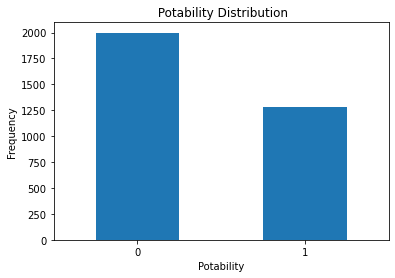

In [63]:
count_Potability = pd.value_counts(df['Potability'], sort = True)

count_Potability.plot(kind = 'bar', rot=0)
plt.title(" Potability Distribution")
plt.xlabel("Potability")
plt.ylabel("Frequency")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [65]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [66]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [67]:
df['ph']=df['ph'].fillna(df['ph'].median())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

<AxesSubplot:xlabel='ph'>

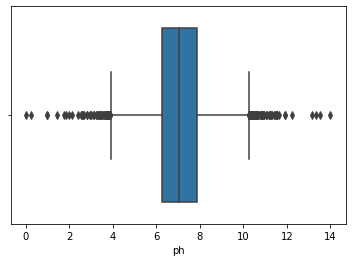

In [68]:
sns.boxplot(df['ph'])

In [69]:
from scipy import stats

In [70]:
IQR = stats.iqr(df['ph'],interpolation='midpoint')
q1 = df.ph.quantile(0.25)
q3 = df.ph.quantile(0.75)
print(q1)
print(q3)

6.277672635884397
7.870049755247176


In [71]:
minL=q1-1.5*(IQR)
maxL=q3+1.5*(IQR)
print(minL)
print(maxL)

3.8886003570184835
10.259122034113089


In [72]:
df.loc[df['ph']>maxL]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
32,10.433291,117.791230,22326.892046,8.161505,307.707509,412.986834,12.890709,65.733478,5.057311,0
47,10.682966,173.375498,15758.740621,5.570784,307.352586,323.807913,10.090870,78.472784,3.999775,0
54,10.560745,181.893366,21783.651033,6.991260,340.390378,456.556402,16.482835,34.252049,3.964686,0
125,10.308478,217.219746,27653.235184,8.912266,369.531206,382.951505,6.580402,59.576040,3.285077,0
...,...,...,...,...,...,...,...,...,...,...
3142,10.503787,125.975185,38605.331530,8.710553,333.073546,674.443476,9.714220,51.697894,5.370458,1
3233,10.485604,136.577381,32872.380566,8.399435,276.921835,416.188546,18.884625,60.078413,4.669240,1
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,1
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,1


In [73]:
df.loc[df['ph']<minL]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0
36,3.641630,183.908722,24752.072460,5.538314,286.059556,456.860096,9.034067,73.594657,3.464353,0
76,3.514546,158.732076,23029.663614,6.821679,286.522847,307.379142,9.712232,79.850929,3.762615,0
77,3.722500,163.639747,37962.167991,6.684570,326.694018,467.562973,14.567269,50.577979,3.662838,0
...,...,...,...,...,...,...,...,...,...,...
3014,0.000000,214.846144,49456.587108,7.897539,333.073546,583.448849,7.702328,77.712891,4.928840,0
3088,2.128531,192.696422,24905.284521,7.757770,383.519892,473.550065,14.286493,56.347830,3.842109,0
3094,1.985383,216.480025,23039.328505,6.769268,344.014256,341.078379,11.498237,78.733441,3.923093,0
3107,3.337629,216.257087,42310.827498,8.130663,333.073546,352.264074,14.029673,52.760961,3.300192,0


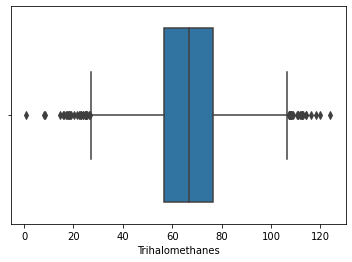

In [74]:
sns.boxplot(df['Trihalomethanes'])
plt.show()

In [75]:
IQR=stats.iqr(df['Trihalomethanes'],interpolation='midpoint')
q1 = df['Trihalomethanes'].quantile(0.25)
q3 = df['Trihalomethanes'].quantile(0.75)
print(q1)
print(q3)

56.64765567150501
76.66660934716015


In [76]:
maxL=q1 - 1.5*(IQR)
minL = q3 + 1.5*(IQR)
print(minL)
print(maxL)

106.71494712179849
26.599317896866662


In [77]:
df.loc[df['Trihalomethanes']<maxL]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
61,6.391354,213.017830,20965.478309,5.375560,327.650543,369.338121,13.758105,17.915723,3.923749,0
133,7.977636,245.895130,32170.069160,9.635636,399.583155,473.662453,11.728338,23.817020,3.552129,0
204,11.267828,161.896362,6040.369868,7.205414,333.073546,316.535871,11.768309,25.525267,4.153347,0
245,7.036752,217.369746,17984.327439,8.594163,333.073546,409.220776,10.213779,18.400012,3.605154,0
330,6.737004,220.100102,24694.744205,8.373660,333.073546,384.308673,6.748092,8.175876,4.063170,1
374,8.882684,135.523062,4857.253807,5.209779,333.073546,532.336659,20.296274,20.337753,3.827921,1
377,7.036752,131.547744,21626.497595,7.207846,333.073546,390.955033,14.844955,26.505484,4.728124,1
518,5.018132,169.397238,29072.038121,10.711475,297.013272,467.218073,15.913761,23.792950,4.286479,0
630,7.918150,214.186611,23823.492888,7.290878,341.173322,411.424483,19.585002,25.057375,4.028958,0
698,6.246264,163.218038,26408.881768,6.029670,429.022312,509.956864,23.569645,19.175175,5.044455,1


In [78]:
df.loc[df['Trihalomethanes']>minL]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
128,11.180695,228.300860,16600.392747,6.094001,333.073546,504.050539,15.035047,110.739299,3.809842,0
284,7.958984,171.483625,23625.813886,9.537735,259.979966,327.623881,16.117110,107.754043,4.698008,1
350,9.158445,186.672973,15797.030396,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
356,7.757270,213.048445,25259.780549,7.635153,363.684814,543.528799,15.254021,107.189584,4.165432,1
531,6.145148,197.541072,39657.272108,9.900159,288.157883,319.434033,11.587378,120.030077,4.600886,0
1038,5.368126,190.937979,32619.312975,8.098839,351.358134,435.666469,11.983635,107.900842,2.004143,0
1053,8.922410,207.520726,13291.922609,8.560537,357.944327,468.538326,15.692738,107.282329,4.081728,0
1081,8.546146,177.846244,23349.485417,7.652073,352.817053,413.321600,12.357385,108.849568,3.505300,1
1156,5.036454,190.164520,29258.738136,4.991061,300.475925,332.359715,11.055801,116.161622,3.534665,1
1157,7.036752,204.860505,24590.125934,7.774361,333.073546,440.936824,12.567061,118.357275,4.318272,1


In [79]:
df.duplicated().sum()

0

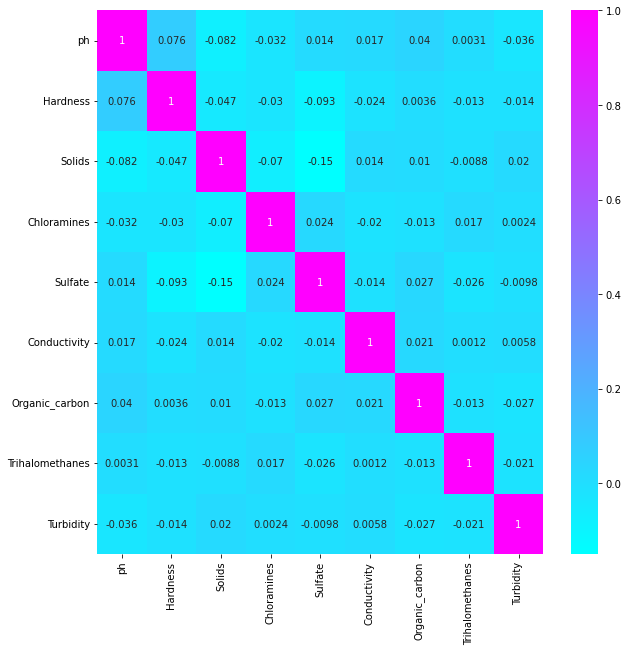

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns='Potability',axis=1).corr(),cmap='cool',annot=True)
plt.show()

In [81]:
X=df.drop("Potability",axis=1)

In [82]:
y=df['Potability']

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=104)

In [196]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

In [197]:
y_train_predict = dt.predict(X_train)
y_train_predict

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [198]:
from sklearn.metrics import accuracy_score,classification_report,recall_score
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [199]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1614
           1       1.00      1.00      1.00      1006

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620



In [200]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
Potability,,
0,1614,0
1,0,1006


In [201]:
test_acc = accuracy_score(y_test,y_hat)
test_acc

0.5929878048780488

In [202]:
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       391
           1       0.50      0.51      0.50       265

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.59      0.59      0.59       656



In [203]:
pd.crosstab(y_hat,y_test)

Potability,0,1
row_0,,
0,254,137
1,130,135


In [204]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
#print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
y_sm.value_counts()
print(Counter(y_sm))

Counter({0: 1998, 1: 1998})


### Hyper Parameter Tuning

In [210]:
from sklearn.model_selection import GridSearchCV

In [103]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [104]:
tree_cv.best_score_

0.6061061061061062

In [167]:
dt1 = DecisionTreeClassifier(criterion = 'gini',max_depth = 16, min_samples_leaf=4, min_samples_split=2,splitter='best')

In [168]:
dt1.fit(X_sm,y_sm)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=4)

In [169]:
y_hat1=dt1.predict(X_test)

In [170]:
y_hat1

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [171]:
acc_test=accuracy_score(y_test,y_hat1)
acc_test

0.8292682926829268

In [172]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       384
           1       0.78      0.82      0.80       272

    accuracy                           0.83       656
   macro avg       0.82      0.83      0.83       656
weighted avg       0.83      0.83      0.83       656



In [173]:
recall=recall_score(y_test,y_hat1)
recall

0.8161764705882353

In [174]:
pd.crosstab(y_test,y_hat1)

col_0,0,1
Potability,,
0,322,62
1,50,222


In [175]:
probs=dt1.predict_proba(X_test)[:,-1]

In [176]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print('AUC:%2f'%auc)

AUC:0.941641
